In [1]:
import pandas as pd
import numpy as np
import pathlib
import os
import shutil

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_pinball_loss,
)

from utils_experiment import (
    load_data,
    get_model_list,
    plot_forecasts_analysis,
    rmse,
    pinball_loss,
    average_pinball_loss,
    plot_quantile_forecast
)

# General data loading for all experiments 

In [2]:
#Identify experiments that are not in the ignore list 
exp_test_description = "Experimental_Analysis"
directory = f"/h/kupfersk/cfpr_2025/generate_forecasts/output/"

ignore_list = [".csv",
               "ipynb",
                "llama",
                "gemini",
                "claude",
                "gpt",
               "Mixtral",
               '5th',
               "restaurants",
               "DeepARModel_exp",
               "ChronosModel_exp",
               "PatchTSTModel_exp",
               "DLinearModel_exp",
               "exp7",
               "exp8",
               "corr",
               "economic",
               "human",
#                "llm",
#                "exp1",
#                "report", 
#                "covariates",
               
]

experiments_include = []

for experiment_name in os.listdir(f"{directory}{'Full_Report'}"):
    if all(keyword not in experiment_name for keyword in ignore_list):
        experiments_include.append(experiment_name)

experiments_include

['ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_',
 'ag_local_DeepARModel',
 'ag_global_all_SimpleFeedForwardModel_exp2_R4_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_R3_',
 'ag_global_all_SimpleFeedForwardModel_exp2_R1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
 'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
 'ag_local_AutoETSModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_PatchTSTModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_',
 'ag_global_all_T

In [5]:

report_sim_dates = open("../generate_forecasts/experiment_cutoff_dates.txt", 'r').read().split()
# report_sim_dates = report_sim_dates[:-1]

# report_sim_dates= [report_sim_dates[-1]]

target_categories = [
    'Bakery and cereal products (excluding baby food)',
     'Dairy products and eggs',
     'Fish, seafood and other marine products',
     'Food purchased from restaurants',
#      'Food',
     'Fruit, fruit preparations and nuts',
     'Meat',
     'Other food products and non-alcoholic beverages',
     'Vegetables and vegetable preparations'
]

target_categories = [f"food_cpi: {col}" for col in target_categories]

start_years = [1986]
random_seed = 42

print("Target Categories:\n" + '\n'.join(target_categories))
print("Report Simulation Dates:\n" + '\n'.join(report_sim_dates))


file_path = "../data/processed_data/all_data_processed.csv"
all_data, foodprice_df, target_categories, all_covariates = load_data(target_categories, file_path)

Target Categories:
food_cpi: Bakery and cereal products (excluding baby food)
food_cpi: Dairy products and eggs
food_cpi: Fish, seafood and other marine products
food_cpi: Food purchased from restaurants
food_cpi: Fruit, fruit preparations and nuts
food_cpi: Meat
food_cpi: Other food products and non-alcoholic beverages
food_cpi: Vegetables and vegetable preparations
Report Simulation Dates:
2018-07-01
2019-07-01
2020-07-01
2021-07-01
2022-07-01
2023-07-01


### Ensure all necessary data is stored in Experimental_Analysis folder for easy access 

In [6]:
# Define the source directory (starting from Full_Report)
source_dir = "../generate_forecasts/output/Full_Report/"
# No need to hard-code the destination directory here; it will be determined dynamically

# Walk through the source directory to find the directories that contain '2024-07-01'
for experiment in os.listdir(source_dir):
    if experiment in experiments_include:
        print(experiment)
        
        for root, dirs, files in os.walk(f"/h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/{experiment}"):
            # Determine the destination directory dynamically by replacing 'Full_Report' with 'Forecasts'
            new_dest = root.replace("Full_Report", "Experimental_Analysis")

            # Ensure the destination directory exists, if not, create it
            os.makedirs(new_dest, exist_ok=True)

            # Move all files from the current 'root' to the new destination directory
            for file in files:
                if '.csv' in file:
                    source_file = os.path.join(root, file)
                    dest_file = os.path.join(new_dest, file)
                    shutil.copy2(source_file, dest_file)  # Use shutil.move() to move files
                    print(f"Moved {source_file} to {dest_file}")


ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_/random_seed_42/2023-07

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R3_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2022-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparatio

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoETSModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2022-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_PatchTSTModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_PatchTSTModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/c

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_/random_seed_42/2019-

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SimpleFeedForwardModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SimpleFeedForwardModel/random_seed_42/2018-

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp2_R3_/random_seed_42/2021-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Expe

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2023-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2023-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel/random_seed_42/2021-07-01/forecasts/food_cpi: Vegetab

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2019-07-01/forecasts/food_cpi: Food.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2019-07-01/forecasts/food_cpi: Food.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R1_/random_seed_42/2022-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_gl

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp5_climate_/random_seed_42/2024-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/gener

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_AutoARIMAModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparati

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveModel/random_seed_42/2020-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveModel/random_seed_42/2020-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_SeasonalNaiveModel/random_seed_42/2020-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_SeasonalNaiveModel/random_seed_42/2020-07-01/forecasts/food_cpi

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_NaiveModel/random_seed_42/2018-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_NaiveModel/random_seed_42/2018

ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P2_/random_seed_42/2023-07

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp5_manufacturing_/random_seed_42/2023-07-01/forecasts/food_cpi:

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2019-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_TemporalFusionTransformerModel_exp2_R2_/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Meat.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_global_all_SimpleFeedForwardModel_exp1_llm_/random_seed_42/2018-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output

Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2019-07-01/forecasts/food_cpi: Vegetables and vegetable preparations.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_seed_42/2019-07-01/forecasts/food_cpi: Fruit, fruit preparations and nuts.csv
Moved /h/kupfersk/cfpr_2025/generate_forecasts/output/Full_Report/ag_local_DLinearModel/random_seed_42/2019-07-01/forecasts/food_cpi: Other food products and non-alcoholic beverages.csv to /h/kupfersk/cfpr_2025/generate_forecasts/output/Experimental_Analysis/ag_local_DLinearModel/random_

### Define evaluation metrics and calculate mape for all periods

In [7]:
# Define the source directory (starting from Full_Report)
source_dir = "../generate_forecasts/output/Experimental_Analysis/"
experiments = experiments_include
experiments

['ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_',
 'ag_local_DeepARModel',
 'ag_global_all_SimpleFeedForwardModel_exp2_R4_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_R3_',
 'ag_global_all_SimpleFeedForwardModel_exp2_R1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
 'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
 'ag_local_AutoETSModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
 'ag_global_all_PatchTSTModel',
 'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
 'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_',
 'ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_',
 'ag_global_all_T

In [8]:
point_metrics = {
    "r2_score": r2_score,
    "mae": mean_absolute_error,
    "mape": mean_absolute_percentage_error,
    "mse": mean_squared_error,
    "rmse": rmse,
}

In [12]:
import json


def compute_all_scores(report_sim_dates, study_metric="mape"):
    global forecast_df
    global actual_df
    global predicted_categories
    
    results = []
    
        
#     # Load the dictionary from the JSON file
#     with open('target_category_dict_filt.json', 'r') as json_file:
#         target_category_dict = json.load(json_file)
        
    for start_year in start_years:
        for EXPERIMENT_NAME in experiments:
            predicted_categories = []
            
            print(EXPERIMENT_NAME)
            if 'ag' in EXPERIMENT_NAME :
                predicted_categories = target_categories
                if "R" not in EXPERIMENT_NAME:
                    if 'exp' in EXPERIMENT_NAME: 
                        general_experiment = f"exp{EXPERIMENT_NAME.split('_exp')[-1]}"
#                         predicted_categories_in = target_category_dict[general_experiment]
                
#                         # Drop items containing the word 'restaurant' or exactly 'food_cpi: Food'
#                         predicted_categories = [item for item in predicted_categories_in if 'restaurant' not in item.lower() and item != 'food_cpi: Food']


            for category in predicted_categories:
                if "restaurant" in category:
                    continue 
                    
                scores = []

                for cutoff_date in report_sim_dates:

                    forecast_csv_path = f"../generate_forecasts/output/{exp_test_description}/{EXPERIMENT_NAME}/random_seed_{random_seed}/{cutoff_date}/forecasts/{category}.csv"
                    forecast_df = pd.read_csv(forecast_csv_path, index_col=0)
                    forecast_df.index = pd.to_datetime(forecast_df.index)

                    actual_df = foodprice_df[category].loc[
                        [
                            date
                            for date in forecast_df.index
                            if date in foodprice_df.index
                        ]
                    ]
                    
                    if report_sim_dates[-1] == cutoff_date:
                        forecast_df = forecast_df.iloc[:-1]
                        actual_df = actual_df.iloc[:-1]


                    if study_metric in point_metrics:
                        median_col = "q_0.5"
                        y_pred = forecast_df[median_col]
                        y_true = actual_df
                        if len(y_pred) > len(y_true):
                            y_pred = y_pred[: len(y_true)]
                        scores.append(
                            point_metrics[study_metric](y_true=y_true, y_pred=y_pred)
                        )

                    elif study_metric == "pinball_loss":
                        y_pred = forecast_df
                        y_true = actual_df
                        if len(y_pred) > len(y_true):
                            y_pred = y_pred[: len(y_true)]
                        scores.append(
                            average_pinball_loss(
                                y_true=y_true,
                                y_pred_quantiles=y_pred,
                                quantiles=[
                                    0.01,
                                    0.05,
                                    0.1,
                                    0.25,
                                    0.75,
                                    0.9,
                                    0.95,
                                    0.99,
                                ],
                            )
                        )

                mean_score = np.mean(scores)
                std_score = np.std(scores)

                results.append(
                    {   "year": start_year,
                        "experiment": EXPERIMENT_NAME,
                        "category": category,
                        "mean_score": mean_score,
                        "std_score": std_score,
                        "scores": scores
                    }
                )

    return pd.DataFrame(results)


In [13]:
with open('../generate_forecasts/target_category_dict_filt.json', 'r') as json_file:
    target_category_dict = json.load(json_file)
    


In [14]:
## For classical model experiments 
mape_df = compute_all_scores(report_sim_dates, "mape")
mape_df

# mape_df['path']= "f'./output/{exp_test_description}/{EXPERIMENT_NAME}/random_seed_42/{cutoff_date}/forecasts/{category}.csv'"
mape_df.experiment.unique()


ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_
ag_local_DeepARModel
ag_global_all_SimpleFeedForwardModel_exp2_R4_
ag_global_all_TemporalFusionTransformerModel_exp2_R3_
ag_global_all_SimpleFeedForwardModel_exp2_R1_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel
ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_
ag_local_AutoETSModel
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_
ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_
ag_global_all_PatchTSTModel
ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_
ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_
ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_
ag_global_all_SimpleFeedForwardModel_exp2_GPT_P4_
ag_global_all_TemporalFusionTransformerModel
ag_local_SimpleFeedForwardModel
ag_globa

array(['ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P3_',
       'ag_local_DeepARModel',
       'ag_global_all_SimpleFeedForwardModel_exp2_R4_',
       'ag_global_all_TemporalFusionTransformerModel_exp2_R3_',
       'ag_global_all_SimpleFeedForwardModel_exp2_R1_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel',
       'ag_global_all_SimpleFeedForwardModel_exp5_geopolitical_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp1_llm_',
       'ag_local_AutoETSModel',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_climate_',
       'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P1_',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_geopolitical_',
       'ag_global_all_PatchTSTModel',
       'ag_global_cpi_with_covariates_TemporalFusionTransformerModel_exp5_manufacturing_',
       'ag_global_all_TemporalFusionTransformerModel_exp2_GPT_P4_',
       'ag_global_all_SimpleFeedFor

In [15]:
mape_df

,year,experiment,category,mean_score,std_score,scores
0,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Bakery and cereal products (excludin...,0.038190,0.035548,"[0.018224074543321752, 0.01271455186428442, 0...."
1,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Dairy products and eggs,0.028687,0.014741,"[0.021830581925373113, 0.02485608967749263, 0...."
2,1986,ag_global_all_TemporalFusionTransformerModel_e...,"food_cpi: Fish, seafood and other marine products",0.021464,0.016533,"[0.013389707090844477, 0.011075559378500145, 0..."
3,1986,ag_global_all_TemporalFusionTransformerModel_e...,"food_cpi: Fruit, fruit preparations and nuts",0.031481,0.020521,"[0.018787713047919243, 0.01953027558995098, 0...."
4,1986,ag_global_all_TemporalFusionTransformerModel_e...,food_cpi: Meat,0.024875,0.011759,"[0.01212864117484809, 0.012952361380156424, 0...."
...,...,...,...,...,...,...
303,1986,ag_local_TemporalFusionTransformerModel,"food_cpi: Fish, seafood and other marine products",0.023271,0.008661,"[0.02123498560360467, 0.014412065320979954, 0...."
304,1986,ag_local_TemporalFusionTransformerModel,"food_cpi: Fruit, fruit preparations and nuts",0.046375,0.022073,"[0.02169973008505353, 0.03503221154346888, 0.0..."
305,1986,ag_local_TemporalFusionTransformerModel,food_cpi: Meat,0.031168,0.010951,"[0.016441312292381497, 0.04095060925211494, 0...."
306,1986,ag_local_TemporalFusionTransformerModel,food_cpi: Other food products and non-alcoholi...,0.031610,0.021170,"[0.012615555976243205, 0.011859104984157813, 0..."


# Figure 2. Do more complicated time-series (ie. food categories) leverage higher capacity models?
Steps:
1) load in all data
2) 


In [16]:
def assign_condition(experiment):
    experiment = experiment.lower()  # Make lowercase for case-insensitive matching
    if 'covariates' in experiment:
        return 'covariates'
    elif 'local' in experiment:
        return 'local'
    elif 'global' in experiment:
        return 'global'    
    else:
        return 'all'  # Default to 'all' if none of the keywords are found

# Define the function to assign model class based on keywords in experiment names
def assign_class(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'transformer' in experiment or 'tst' in experiment: 
        return 'Transformer'

    # Check for LLM models (Chronos in this case)
    elif 'chronos' in experiment:
        return 'Foundation'

    # Check for general deep learning models
    elif 'global' in experiment:
        return 'Deep Learning'

    # Check for statistical models
    elif 'autoets' in experiment or 'arima' in experiment or 'naive' in experiment:
        return 'Statistical'

    # Default to 'Deep Learning' if no keywords match
    else:
        return 'Deep Learning'
    
    
def assign_complexity(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'transformer' in experiment or 'tst' in experiment: 
        return '3'

    # Check for LLM models (Chronos in this case)
    elif 'chronos' in experiment:
        return '4'

    # Check for general deep learning models
    elif 'global' in experiment:
        return '2'

    # Check for statistical models
    elif 'autoets' in experiment or 'arima' in experiment or 'naive' in experiment:
        return '1'

    # Default to 'Deep Learning' if no keywords match
    else:
        return '2'
    
def assign_model(experiment):
    experiment = experiment.lower()  # Convert to lowercase for case-insensitive matching

    # Check for Transformer models first to avoid overlap with "Deep Learning"
    if 'transformer' in experiment:
        return 'TemporalFusionTransformer'
    
    # Check for LLM models (Chronos in this case)
    elif 'tst' in experiment:
        return 'PatchTST'

    # Check for LLM models (Chronos in this case)
    elif 'deepar' in experiment:
        return 'DeepAR'

    # Check for general deep learning models
    elif 'simple' in experiment:
        return 'SimpleFeedForwardNetwork'
    
    # Check for general deep learning models
    elif 'linear' in experiment:
        return 'DLinear'
    
    # Check for general deep learning models
    elif 'chronos' in experiment:
        return 'Chronos'

    # Check for statistical models
    elif 'ets' in experiment:
        return 'Exponential smoothing'
    
    # Check for statistical models
    elif 'arima' in experiment:
        return 'ARIMA'
    
    # Check for statistical models
    elif 'naive' in experiment:
        return 'Naive'

    # Default to 'Deep Learning' if no keywords match
    else:
        return 'Other'

    
# Apply the function to add a new column 'condition' in filt_df
mape_df['condition'] = mape_df['experiment'].apply(assign_condition)
mape_df['class'] = mape_df['experiment'].apply(assign_class)
mape_df['complexity'] = mape_df['experiment'].apply(assign_complexity)
mape_df['model_name'] = mape_df['experiment'].apply(assign_model)




mape_df['model_name'].unique()

array(['TemporalFusionTransformer', 'DeepAR', 'SimpleFeedForwardNetwork',
       'Exponential smoothing', 'PatchTST', 'Chronos', 'ARIMA', 'Naive',
       'DLinear'], dtype=object)

In [17]:

# Step 1: Rank the models within each category
mape_df['rank'] = mape_df.groupby('category')['mean_score'].rank(method='min', ascending=True)

# Step 2: Sort by category and rank for easy reading
df_sorted = mape_df.sort_values(['category', 'rank'])

# Step 3: Format the table to show only necessary columns
summary_table = df_sorted[['category', 'rank', 'experiment', 'mean_score']]

# Display the table
summary_table


,category,rank,experiment,mean_score
56,food_cpi: Bakery and cereal products (excludin...,1.0,ag_local_AutoETSModel,0.033190
42,food_cpi: Bakery and cereal products (excludin...,2.0,ag_global_all_SimpleFeedForwardModel_exp5_geop...,0.035196
252,food_cpi: Bakery and cereal products (excludin...,3.0,ag_global_all_ChronosModel,0.035216
210,food_cpi: Bakery and cereal products (excludin...,4.0,ag_local_NaiveModel,0.035449
245,food_cpi: Bakery and cereal products (excludin...,5.0,ag_global_all_TemporalFusionTransformerModel_e...,0.036700
...,...,...,...,...
300,food_cpi: Vegetables and vegetable preparations,40.0,ag_global_all_SimpleFeedForwardModel_exp2_GPT_P3_,0.068291
111,food_cpi: Vegetables and vegetable preparations,41.0,ag_global_all_SimpleFeedForwardModel_exp2_GPT_P1_,0.070762
146,food_cpi: Vegetables and vegetable preparations,42.0,ag_global_all_SimpleFeedForwardModel_exp2_GPT_P2_,0.071837
209,food_cpi: Vegetables and vegetable preparations,43.0,ag_local_SeasonalNaiveModel,0.073419


### All experiments

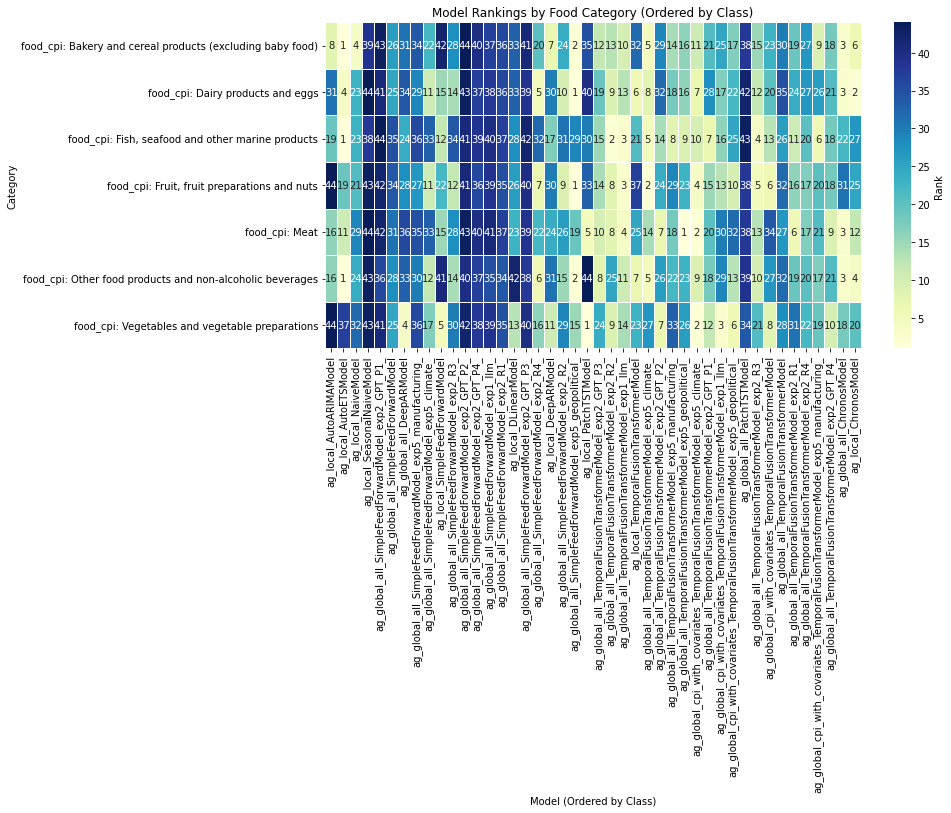

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 2: Sort mape_df by 'class' using the custom order and get the sorted unique experiment names
# Group experiments by their class order
sorted_mape_df = mape_df.sort_values(by='complexity')
sorted_experiments = sorted_mape_df['experiment'].unique()

# Step 3: Pivot the table to have categories as rows, models as columns, and rank as values
pivot_df = mape_df.pivot(index='category', columns='experiment', values='rank')

# Step 4: Reorder columns in pivot_df according to sorted_experiments
pivot_df = pivot_df.reindex(columns=sorted_experiments)

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Rank'}, linewidths=0.5, fmt=".0f")
plt.title("Model Rankings by Food Category (Ordered by Class)")
plt.xlabel("Model (Ordered by Class)")
plt.ylabel("Category")
plt.show()

### Best of each model 

In [ ]:
# Step 1: Group by `category` and `model_name`, and select the row with the minimum `mean_score` for each group
best_models_df = mape_df.loc[mape_df.groupby(['category', 'model_name'])['mean_score'].idxmin()]

# Step 2: Sort the resulting DataFrame for readability (optional)
best_models_df = best_models_df.sort_values(by=['category', 'mean_score'])
best_models_df

best_models_df.loc[best_models_df['model_name']=='SimpleFeedForwardNetwork']
best_models_df = best_models_df.drop(columns='experiment').reset_index(drop=True)
best_models_df

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 2: Sort mape_df by 'class' using the custom order and get the sorted unique experiment names
# Group experiments by their class order
sorted_mape_df = best_models_df.sort_values(by='complexity')
sorted_model_names = sorted_best_models_df['model_name'].unique()


# Step 3: Pivot the table to have categories as rows, models as columns, and rank as values
pivot_df = sorted_mape_df.pivot(index='category', columns='model_name', values='rank')
pivot_df = pivot_df.reindex(columns=sorted_model_names)

# Step 4: Reorder the columns in `pivot_df` according to `sorted_model_names`
pivot_df = pivot_df.reindex(columns=sorted_model_names)


# Step 5: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Rank'}, linewidths=0.5, fmt=".0f")
plt.title("Model Rankings by Food Category (Ordered by Class)")
plt.xlabel("Model (Ordered by Class)")
plt.ylabel("Category")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `pivot_df` and `sorted_mape_df` are already defined

# Remove "food_cpi" and take the first word of each category
pivot_df.index = pivot_df.index.str.replace("food_cpi: ", "").str.split().str[0]

# Set Helvetica as the only font for a clean, modern look
plt.rcParams.update({
    'font.size': 13, 
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica'],
    'axes.edgecolor': 'lightgrey', 
    'axes.linewidth': 0.8,
    'xtick.color': 'gray',
    'ytick.color': 'gray'
})

# Set up the figure with additional padding for a clean look
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)

# Use a light green "seagreen" palette
custom_cmap = sns.light_palette("lightsteelblue", as_cmap=True)

# Plot the heatmap with the custom light green color scheme
sns.heatmap(
    pivot_df, annot=True, cmap=custom_cmap, cbar_kws={'label': 'Rank'}, 
    linewidths=0.2, linecolor='lightgrey', fmt=".0f", annot_kws={"size": 12, "color": "black", "weight": "bold"},
    ax=ax
)

# Calculate class boundaries for heavy, dark green separator lines
model_classes = sorted_mape_df.set_index('model_name')['class'].to_dict()
sorted_classes = [model_classes[model] for model in pivot_df.columns]
class_boundaries = [i for i in range(1, len(sorted_classes)) if sorted_classes[i] != sorted_classes[i - 1]]

# Add dark green lines between different classes
for boundary in class_boundaries:
    plt.axvline(x=boundary, color='black', linewidth=3, linestyle='--')  # Dark green for class divider

# Customize x and y axis labels for a refined look
plt.xticks(rotation=45, ha='right', fontsize=12, weight='light', color="black")
plt.yticks(rotation=0, ha='right', fontsize=12, weight='light', color="black")

# Set subtle axis titles with extra padding
plt.title("Model Rankings by Food Category Sorted By Model Capacity", fontsize=18, weight='bold', color="#333333", pad=20)
plt.xlabel("Model (Classified)", fontsize=16, weight='regular', color="#333333", labelpad=10)
plt.ylabel("Category", fontsize=16, weight='regular', color="#333333", labelpad=10)

# Style the color bar for a sleek appearance
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(13)
cbar.ax.yaxis.label.set_weight("light")
cbar.outline.set_edgecolor('lightgrey')
cbar.ax.tick_params(color='grey', labelsize=12)

# Add layout adjustments for a clean, presentation-ready appearance
plt.tight_layout(pad=2)
plt.show()
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': ['Helvetica']})

plt.savefig("model_rankings_heatmap.png", format="png", dpi=300, bbox_inches="tight")


In [ ]:
import numpy as np
import pandas as pd

def calculate_shannon_entropy(series):
    """
    Calculate Shannon entropy for a pandas Series.

    Parameters:
    series (pd.Series): The time series data.

    Returns:
    float: Shannon entropy of the time series.
    """
    # Normalize the series values to probabilities
    value_counts = series.value_counts(normalize=True)
    
    # Calculate Shannon entropy
    entropy = -np.sum(value_counts * np.log2(value_counts))
    
    return entropy

foodprice_df

# Calculate entropy for each column
entropy_values = foodprice_df.apply(calculate_shannon_entropy)
entropy_values

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL


def calculate_shannon_entropy(series):
    """
    Calculate Shannon entropy for a pandas Series.

    Parameters:
    series (pd.Series): The time series data.

    Returns:
    float: Shannon entropy of the time series.
    """
    # Normalize the series values to probabilities
    value_counts = series.value_counts(normalize=True)
    
    # Calculate Shannon entropy
    entropy = -np.sum(value_counts * np.log2(value_counts))
    
    return entropy

foodprice_df

# Calculate entropy for each column
entropy_values = foodprice_df.apply(calculate_shannon_entropy)
entropy_values

def calculate_trend_seasonality_residual_metrics(series, period):
    """
    Calculate trend, seasonality strength, and residual metrics for a time series using STL decomposition.

    Parameters:
    series (pd.Series): The time series data.
    period (int): The seasonality period (e.g., 12 for monthly data in a yearly cycle).

    Returns:
    dict: A dictionary containing trend strength, seasonality strength, and residual metrics.
    """
    # Perform STL decomposition
    stl = STL(series, period=period)
    result = stl.fit()
    
    # Extract components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Calculate variances
    var_trend = np.var(trend)
    var_seasonal = np.var(seasonal)
    var_residual = np.var(residual)
    
    # Calculate trend and seasonality strength
    trend_strength = 1 - (var_residual / (var_residual + var_trend))
    seasonality_strength = 1 - (var_residual / (var_residual + var_seasonal))
    
    # Additional metrics for the residual component
    residual_variance = var_residual
    residual_mad = np.mean(np.abs(residual))
    
    return {
        'Trend Strength': trend_strength,
        'Seasonality Strength': seasonality_strength,
        'Residual Variance': residual_variance,
        'Residual MAD': residual_mad
    }

# Specify the seasonality period (e.g., 12 for monthly data with yearly seasonality)
period = 12

# Calculate trend, seasonality, and residual metrics for each time series and store in a DataFrame
trend_seasonality_residual_df = pd.DataFrame(
    foodprice_df.apply(lambda col: calculate_trend_seasonality_residual_metrics(col, period)).tolist(),
    index=foodprice_df.columns
)
trend_seasonality_residual_df["Shannon's Entropy"]= entropy_values
trend_seasonality_residual_df

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL

def calculate_shannon_entropy(series):
    value_counts = series.value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts))
    return entropy

def calculate_trend_seasonality_residual_metrics(series, period):
    stl = STL(series, period=period)
    result = stl.fit()
    
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    var_trend = np.var(trend)
    var_seasonal = np.var(seasonal)
    var_residual = np.var(residual)
    
    trend_strength = 1 - (var_residual / (var_residual + var_trend))
    seasonality_strength = 1 - (var_residual / (var_residual + var_seasonal))
    
    residual_variance = var_residual
    residual_mad = np.mean(np.abs(residual))
    
    return {
        'Trend Strength': trend_strength,
        'Seasonality Strength': seasonality_strength,
        'Residual Variance': residual_variance,
        'Residual MAD': residual_mad
    }

# Define the seasonality period (e.g., 12 for monthly data with yearly seasonality)
period = 12

# Initialize a dictionary to hold mean and std of metrics for all categories
final_summary = {}

# Iterate through each food category in the DataFrame
for category in foodprice_df.columns:
    # Initialize a list to store the 3-year windowed metrics for this category
    windowed_metrics = []
    
    # Define 3-year overlapping windows
    start_year = foodprice_df.index.year.min()
    end_year = foodprice_df.index.year.max() - 2

    # Calculate metrics for each 3-year window
    for year in range(start_year, end_year + 1):
        # Define the 3-year window
        window_df = foodprice_df[category][(foodprice_df.index.year >= year) & (foodprice_df.index.year <= year + 2)]
        
        # Calculate Shannon entropy for the window
        entropy_value = calculate_shannon_entropy(window_df)
        
        # Calculate trend, seasonality, and residual metrics for the window
        metrics = calculate_trend_seasonality_residual_metrics(window_df, period)
        
        # Add Shannon entropy to the metrics dictionary
        metrics["Shannon's Entropy"] = entropy_value
        
        # Append the metrics dictionary to the list for the category
        windowed_metrics.append(metrics)

    # Convert the list of metrics dictionaries to a DataFrame for easy aggregation
    windowed_df = pd.DataFrame(windowed_metrics)
    
    # Calculate mean and standard deviation of each metric over the 3-year windows
    mean_values = windowed_df.mean()
    std_values = windowed_df.std()
    
    # Combine mean and std for each metric
    summary = {f"{metric} Mean": mean for metric, mean in mean_values.items()}
    summary.update({f"{metric} Std Dev": std for metric, std in std_values.items()})
    
    # Add the summary to the final dictionary
    final_summary[category] = summary

# Convert the final summary dictionary to a DataFrame
final_summary_df = pd.DataFrame(final_summary).T

# Display the final DataFrame
final_summary_df


,Trend Strength Mean,Seasonality Strength Mean,Residual Variance Mean,Residual MAD Mean,Shannon's Entropy Mean,Trend Strength Std Dev,Seasonality Strength Std Dev,Residual Variance Std Dev,Residual MAD Std Dev,Shannon's Entropy Std Dev
food_cpi: Bakery and cereal products (excluding baby food),0.952421,0.797988,0.263272,0.329957,4.707369,0.064319,0.116498,0.363644,0.241056,0.206654
food_cpi: Dairy products and eggs,0.943950,0.813385,0.110205,0.210466,4.558633,0.114729,0.112336,0.167822,0.129943,0.329915
"food_cpi: Fish, seafood and other marine products",0.917262,0.797065,0.172282,0.295840,4.616055,0.123100,0.119578,0.133586,0.120508,0.337076
food_cpi: Food purchased from restaurants,0.997889,0.721498,0.022357,0.094153,4.895573,0.001764,0.170504,0.035761,0.062899,0.197730
"food_cpi: Fruit, fruit preparations and nuts",0.842775,0.866410,0.861951,0.677106,4.844638,0.140897,0.103499,0.666480,0.260025,0.167424
food_cpi: Meat,0.923722,0.759876,0.394234,0.425035,4.709998,0.112645,0.139254,0.512245,0.262671,0.226256
food_cpi: Other food products and non-alcoholic beverages,0.950140,0.859172,0.130480,0.252585,4.565124,0.066685,0.080375,0.129472,0.128445,0.292588
food_cpi: Vegetables and vegetable preparations,0.736034,0.908435,3.697914,1.341024,5.019083,0.245073,0.065703,3.685271,0.608836,0.088194


In [14]:
#  Initialize a new DataFrame to store rankings
ranked_df = pd.DataFrame(index=final_summary_df.index)

# Rank each mean metric according to the specified ordering
ranked_df['Trend Strength Rank'] = final_summary_df['Trend Strength Mean'].rank(ascending=False).astype(int)
ranked_df['Seasonality Strength Rank'] = final_summary_df['Seasonality Strength Mean'].rank(ascending=False).astype(int)
ranked_df['Residual Variance Rank'] = final_summary_df['Residual Variance Mean'].rank(ascending=True).astype(int)
ranked_df['Residual MAD Rank'] = final_summary_df['Residual MAD Mean'].rank(ascending=True).astype(int)
ranked_df["Shannon's Entropy Rank"] = final_summary_df["Shannon's Entropy Mean"].rank(ascending=True).astype(int)

# Sum the ranks to create a final ranking score
ranked_df['Total Rank'] = ranked_df.sum(axis=1)
ranked_df["Overall Rank"] = ranked_df['Total Rank'].rank(ascending=True).astype(int)


# Display the final ranked DataFrame
ranked_df

,Trend Strength Rank,Seasonality Strength Rank,Residual Variance Rank,Residual MAD Rank,Shannon's Entropy Rank,Total Rank,Overall Rank
food_cpi: Bakery and cereal products (excluding baby food),2,5,5,5,4,21,4
food_cpi: Dairy products and eggs,4,4,2,2,1,13,1
"food_cpi: Fish, seafood and other marine products",6,6,4,4,3,23,5
food_cpi: Food purchased from restaurants,1,8,1,1,7,18,3
"food_cpi: Fruit, fruit preparations and nuts",7,2,7,7,6,29,6
food_cpi: Meat,5,7,6,6,5,29,6
food_cpi: Other food products and non-alcoholic beverages,3,3,3,3,2,14,2
food_cpi: Vegetables and vegetable preparations,8,1,8,8,8,33,8


In [16]:
# Initialize an empty DataFrame to store formatted results
formatted_summary_df = pd.DataFrame(index=final_summary_df.index)

# Loop through the metrics, combining mean and std values with three decimal places
for metric in ["Trend Strength", "Seasonality Strength", "Residual Variance", "Residual MAD", "Shannon's Entropy"]:
    # Format each metric as "mean ± std" with three decimal places
    formatted_summary_df[metric] = final_summary_df[f"{metric} Mean"].round(3).astype(str) + " ± " + final_summary_df[f"{metric} Std Dev"].round(3).astype(str)

# Display the final formatted DataFrame
formatted_summary_df['Overall Rank'] = ranked_df['Overall Rank']
formatted_summary_df

,Trend Strength,Seasonality Strength,Residual Variance,Residual MAD,Shannon's Entropy,Overall Rank
food_cpi: Bakery and cereal products (excluding baby food),0.952 ± 0.064,0.798 ± 0.116,0.263 ± 0.364,0.33 ± 0.241,4.707 ± 0.207,4
food_cpi: Dairy products and eggs,0.944 ± 0.115,0.813 ± 0.112,0.11 ± 0.168,0.21 ± 0.13,4.559 ± 0.33,1
"food_cpi: Fish, seafood and other marine products",0.917 ± 0.123,0.797 ± 0.12,0.172 ± 0.134,0.296 ± 0.121,4.616 ± 0.337,5
food_cpi: Food purchased from restaurants,0.998 ± 0.002,0.721 ± 0.171,0.022 ± 0.036,0.094 ± 0.063,4.896 ± 0.198,3
"food_cpi: Fruit, fruit preparations and nuts",0.843 ± 0.141,0.866 ± 0.103,0.862 ± 0.666,0.677 ± 0.26,4.845 ± 0.167,6
food_cpi: Meat,0.924 ± 0.113,0.76 ± 0.139,0.394 ± 0.512,0.425 ± 0.263,4.71 ± 0.226,6
food_cpi: Other food products and non-alcoholic beverages,0.95 ± 0.067,0.859 ± 0.08,0.13 ± 0.129,0.253 ± 0.128,4.565 ± 0.293,2
food_cpi: Vegetables and vegetable preparations,0.736 ± 0.245,0.908 ± 0.066,3.698 ± 3.685,1.341 ± 0.609,5.019 ± 0.088,8


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Set default parameters for plot aesthetics
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.titleweight'] = 'bold'

# Define the number of rows and columns for the subplot grid
nrows, ncols = 3, 3

# Sort ranked_df by Overall Rank to plot from easiest to most complex
sorted_ranked_df = ranked_df.sort_values(by='Overall Rank')
sorted_categories = sorted_ranked_df.index  # Ordered list of categories by overall rank

# Create the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Plot each category in sorted order
for idx, category in enumerate(sorted_categories):
    ax = axes[idx // ncols, idx % ncols]  # Get current axis

    # Extract data for the category, assuming foodprice_df is the main time-series data
    context_df = foodprice_df[category].loc[(foodprice_df.index >= "1986-01-01")]

    # Plot the historical data
    ax.plot(context_df.index, context_df.values, color='black', label='Historical CPI')

    # Shorten the category name and add the overall rank in the subtitle
    short_name = category.split(": ")[1].split()[0]  # Get only the first word after "food_cpi: "
    overall_rank = sorted_ranked_df.loc[category, 'Overall Rank']
    ax.set_title(f"{short_name}\nOverall Rank: {overall_rank}", fontsize=14)

    # Customize each subplot
    ax.set_xlabel('Date')
    ax.set_ylabel('CPI (% 2002 Prices)')
    ax.grid(axis='y')
    ax.axvline(pd.to_datetime("2024-08-01"), color='black', linestyle='--', linewidth=1, alpha=0.5)
    
    # Format x-axis with ticks every 2 years
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(ax.get_xticklabels(), rotation=45)

# Hide any unused subplots
for idx in range(len(sorted_categories), nrows * ncols):
    fig.delaxes(axes[idx // ncols, idx % ncols])

# Adjust layout and show plot
plt.tight_layout()
plt.show()
